# <span style="color:royalblue"><center>Transformación lineal y no lineal</center></span>


Una transformación lineal es todo aquel procedimiento ene l cual los datos están distirbuidos de la manera más simétrica posible, donde los datos tienden a estar de forma *normal*. Pero, **¿qué sucede cuando los datos no están dispuestos de forma simétrica?** la respuesta es que normalmente se debe hacer una transformación no lineal con el fin de poder abordar el problema de forma lineal. Es decir, normalizar de tal forma que los datos se comporten de manera normalizada y esto reduzca el problema.

* ¿Por qué usarlos?
Datos fuertmeente sesgados, no simétricos.

* ¿Hay diferentes tipos?
Se puede aplciar a los datos muchas funciones para simetrizar, como por ejemplo: Logaritmos, sigmoides, polinomiales, etc...

* ¿Cuándo usarlos?
Antes del escalamiento lineal de los datos.

## Ejemplo usando la función $Tanh(x)$

Esta función está acotada por arriba en 1 y por debajo en -1.
Una característica fundamental es que cuando se pasan datos muy asimétricos, por ejemplo con una cola positva larga, eso indicaría que la posición de los puntos en x se hace así mismo larga.
Por ende, la franja que va a ocupar en y se hace cada vez más tendiente a 0. En tanto que los datos más cercanos a 0, que para efectos gaussianos debería ser el dato más repetido y su $\mu$ estaría allí, van a ocupar una franja más grande en y por cuenta de cómo está desarrollada en sí misma la función.
Ver abajo.

Cuando a la función se le agrega el parámetro tal que $X$ pasa a ser un $\frac{X}{a}$ con $a != 0$, se puede hacer que sea más abrupta la pendiente que tiene la tangente o más suavizada. Esto implica que se puede transformar para calibrar los datos.

Lo mismo ocurriría con la función $\sqrt{X}$ en el sentido de que estrictamente hablandouna raíz cuadrara es $X^\frac{1}{2}$ y ésto puede entenderse como un $X^\frac{a}{b}$ con $a$ y $b$ siendo cualquier posibilidad para suavizar la función siempre que $b != 0$

C:\Users\Mateo\AppData\Local\Temp\ipykernel_2136\2457511357.py:7: RuntimeWarning: invalid value encountered in sqrt
  y1 = np.sqrt(x)


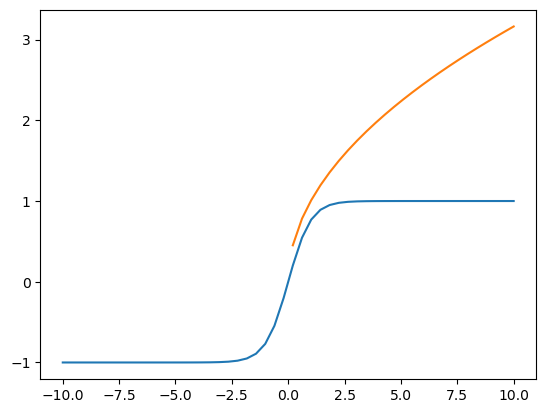

In [6]:
# Ejemplo de la Tanh(x)
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10,10)
y = np.tanh(x)
y1 = np.sqrt(x)
plt.plot(x,y)
plt.plot(x,y1)

# <span style="color:royalblue"><center>Escalamiento de datos numéricos</center></span>

Uno de los problemas recurrentes en modelos de ML y DS es que los optimizadores funcionan de manera más eficiente entre valores de $[-1,1]$. Entonces, si se tienen variables a ajustar con escalas muy distintas, por ejemplo datos que van desde decimales hasta millones, no va a hacer match ningún proceso que se le aplique. Debe haber un **preprocesamiento de los datos** y esto es a lo que se le conoce como **NORMALIZAR|ESCALAR**. 

Hay muchas formas de escalamiento lineal, como lo son:
* max-min:

$X$ -> $Xs$, en donde 

$Xs$ = $\frac{2X - min - max}{max-min}$

-----
* Clipping / Winsorizing:

Se colapsa a los intervalos min y max, es decir, todo valor por debajo del $Q1$ se colapsa al valor mismo del $Q1$ y cualquier valor por encima del $Q3$ se colapsa al valor mismo del $Q3$.

Si no se hace con base en los percentiles, sino que se hace de forma arbitraria, simplemente se llama clipping

-----
* Z-score:

Es uno de los más usados.

Para cualquier muestra de datos $X$, donde $X = {X1,X2,X3,...,Xn}$ hay una media $\mu$ y una desviación estándar $\sigma$ de tal manera que cada dato estandarizado corresponde a:


$Xs$ = $\frac{X-\mu}{\sigma}$,

Es decir, a cada valor de la distribución se le resta la media y se le divide por la desviación estándar. Acá mucho más importante, la distribución queda mayoritariamente de forma típica normal, es decir con $\mu = 0$ y $\sigma = 1$

Pero el hecho es que únicamente es buena idea utilizarlos cuando la data está simétricamente y/o uniformemente distirbuida.

### Transformaciones lineales

In [12]:
X,y = datasets.load_diabetes(as_frame=True,return_X_y=True)
display(X)
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [24]:
import timeit
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

X, y = datasets.load_diabetes(return_X_y=True)
raw = X[:, None, 2]

Detalles del dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

(array([32., 66., 98., 90., 61., 53., 23., 12.,  5.,  2.]),
 array([-1.89792941, -1.34956464, -0.80119987, -0.2528351 ,  0.29552967,
         0.84389444,  1.39225921,  1.94062398,  2.48898875,  3.03735352,
         3.58571828]),
 <BarContainer object of 10 artists>)

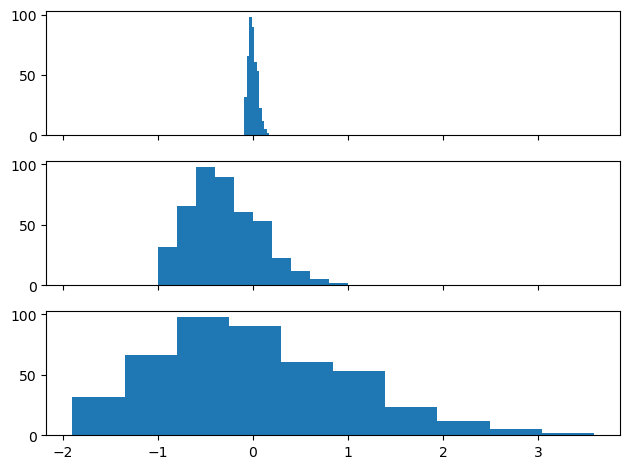

In [25]:
# escalamiento max-min
max_raw = max(raw)
min_raw = min(raw)
scaled = (2*raw - max_raw -min_raw)/(max_raw - min_raw)

# normalización Z-score

avg = np.average(raw)
std = np.std(raw)
z_scaled = (raw - avg)/std

fig, axs = plt.subplots(3, 1, sharex=True, tight_layout=True)

axs[0].hist(raw)
axs[1].hist(scaled)
axs[2].hist(z_scaled)

In [26]:
# modelos para entrenamiento
def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

def train_z_scaled():
    linear_model.LinearRegression().fit(z_scaled, y)

In [28]:
#Que mida el tiempo y que repita el ejercicio x num veces
raw_time = timeit.timeit(train_raw, number = 100)
scaled_time = timeit.timeit(train_raw, number = 100)
z_scaled_time = timeit.timeit(train_raw, number = 100)
print('trainning time for raw data : {} '.format(raw_time))
print('trainning time for scaled data : {}'.format(scaled_time))
print('trainning time for z_scaled data : {}'.format(z_scaled_time))

trainning time for raw data : 0.06250330002512783 
trainning time for scaled data : 0.05834370001684874
trainning time for z_scaled data : 0.05273749999469146


* max-min scaling: mejor para datos uniformemente distribuidos
* z-score scaling: mejor para datos distribuidos "normalmente" (forma de campana de gauss)

Utilidades de Scikit Learn : https://scikit-learn.org/stable/modules/preprocessing.html

### Transformaciones no lineales

In [30]:
df = pd.read_csv('cars.csv')

<AxesSubplot: >

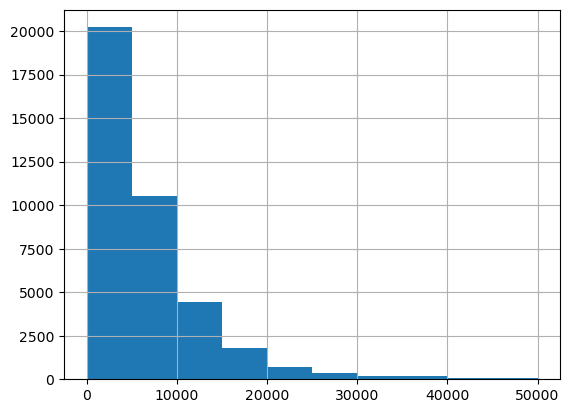

In [31]:
df.price_usd.hist()

Transformación con $$tanh(x)$$

<AxesSubplot: >

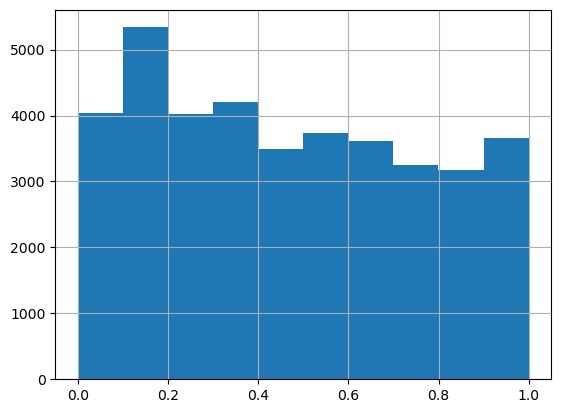

In [33]:
p = 10000
df.price_usd.apply(lambda x: np.tanh(x/p)).hist()

* mapear datos a una distribucion gaussiana: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html#sphx-glr-auto-examples-preprocessing-plot-map-data-to-normal-py